In [1]:
import keras
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

Using TensorFlow backend.


In [0]:
df = pd.read_csv('breastcancercoimbra.csv')
pd.options.display.float_format = '{:,.0f}'.format

In [27]:
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,24,70,3,0,9,10,8,417,1
1,83,21,92,3,1,9,5,4,469,1
2,82,23,91,4,1,18,22,9,555,1
3,68,21,77,3,1,10,7,13,928,1
4,86,21,92,4,1,7,5,11,774,1
...,...,...,...,...,...,...,...,...,...,...
111,45,27,92,3,1,55,12,11,268,2
112,62,27,100,5,1,12,21,7,330,2
113,65,32,97,6,1,61,23,10,314,2
114,72,26,82,3,1,25,34,3,392,2


In [0]:
X = df.values[:, 0:9]
Y = df.values[:, 9]

In [29]:
X

array([[ 48.        ,  23.5       ,  70.        , ...,   9.7024    ,
          7.99585   , 417.114     ],
       [ 83.        ,  20.69049454,  92.        , ...,   5.429285  ,
          4.06405   , 468.786     ],
       [ 82.        ,  23.12467037,  91.        , ...,  22.43204   ,
          9.27715   , 554.697     ],
       ...,
       [ 65.        ,  32.05      ,  97.        , ...,  22.54      ,
         10.33      , 314.05      ],
       [ 72.        ,  25.59      ,  82.        , ...,  33.75      ,
          3.27      , 392.46      ],
       [ 86.        ,  27.18      , 138.        , ...,  14.11      ,
          4.35      ,  90.09      ]])

In [30]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [0]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=2)

In [0]:
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,10), random_state=1)

In [34]:
classifier.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

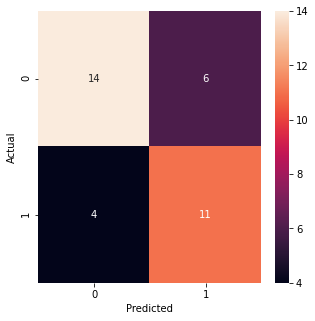

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(Y_test, Y_test_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [37]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

         1.0       0.78      0.70      0.74        20
         2.0       0.65      0.73      0.69        15

    accuracy                           0.71        35
   macro avg       0.71      0.72      0.71        35
weighted avg       0.72      0.71      0.72        35

